### Question 2: Salary
Is that true that software engineer make more money than Data scientist or data analyst?

In [3]:
# setup
import pandas as pd
import numpy as np
import clean_data as c
import os


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# load data produced by prepare_data.ipynb
# here i used data from 2018 and 2019 
# since the questions in both years's survey are similar
data_2018_q2 = pd.read_pickle('data_2018_q2')
data_2019_q2 = pd.read_pickle('data_2019_q2')
data = pd.read_pickle('data') # data from 2018 and 2019
print(data.columns)

Index(['Respondent', 'is_DS_ML', 'is_DA', 'is_DEV', 'is_full_time',
       'is_student', 'edlevel', 'major', 'salary', 'salary_freq', 'country',
       'salary_annual', 'company_size', 'JobSat', 'year'],
      dtype='object')


Text(0.5, 0, '')

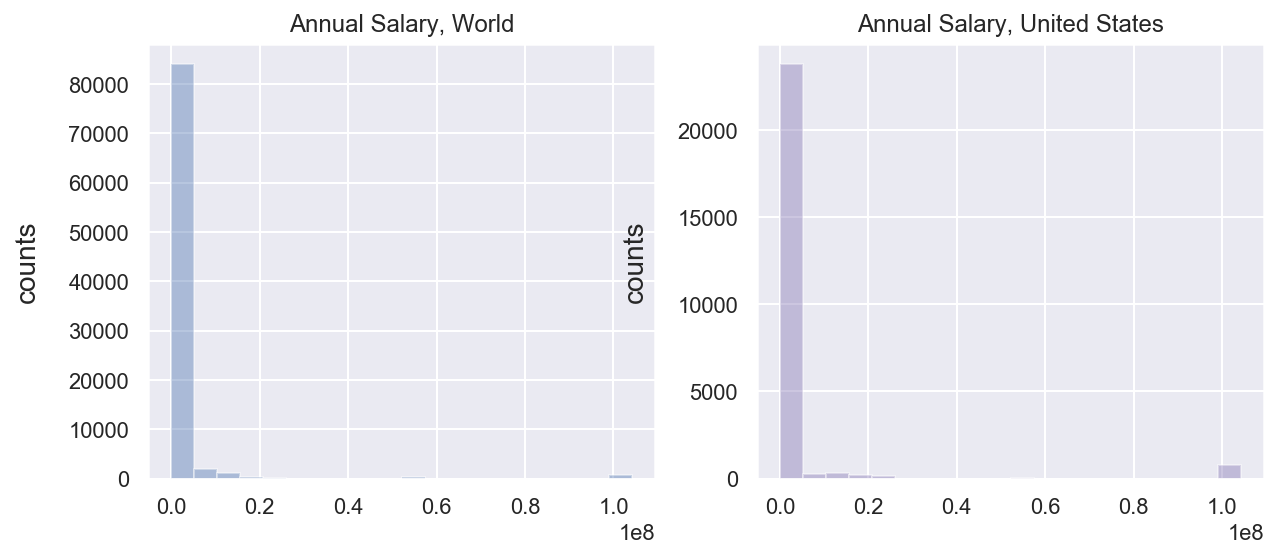

In [5]:
# annual salary
salary_annual = data[data['is_full_time']]['salary_annual']
# annual salary in United States
salary_annual_US = data[data['is_full_time'] &(data['country']=='United States')]['salary_annual']
# plot the distribution of the salary

# world
sns.set()
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.distplot(salary_annual, 20, kde=False, ax=ax[0])
ax[0].set_ylabel('counts', fontsize = 14, labelpad= 14);
ax[0].set_title('Annual Salary, World')
ax[0].set_xlabel('')

# United States
sns.distplot(salary_annual_US, 20, color = 'm', kde=False, ax=ax[1])
ax[1].set_ylabel('counts', fontsize = 14, labelpad= 14);
ax[1].set_title('Annual Salary, United States')
ax[1].set_xlabel('')

Saving figure Salary_distribution


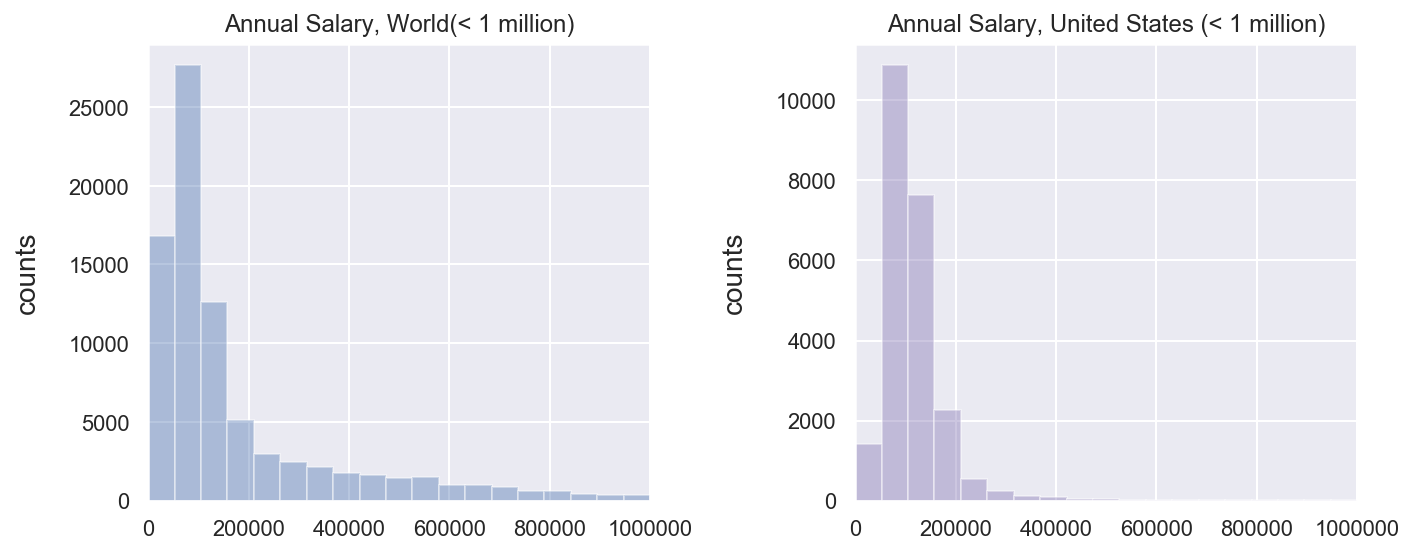

In [6]:
# annual salary in the world
sns.set()
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.distplot(salary_annual, bins = np.linspace(0, 1e6, 20), kde=False, ax=ax[0])
ax[0].set_ylabel('counts', fontsize = 14, labelpad= 14);
ax[0].set_title('Annual Salary, World(< 1 million)')
ax[0].set_xlim([0, 1e6])
ax[0].set_xlabel('')

# annual salary in United States
sns.distplot(salary_annual_US, bins = np.linspace(0, 1e6, 20), color = 'm', kde=False, ax=ax[1])
ax[1].set_ylabel('counts', fontsize = 14, labelpad= 14);
ax[1].set_title('Annual Salary, United States (< 1 million)')
ax[1].set_xlim([0, 1e6])
ax[1].set_xlabel('')

# save figure
save_fig('Salary_distribution')
plt.show()

Since the salaries is right-skewed, it is better to compare their median other than mean

In [7]:
# compare the median and 25th 75th quantile
salary_ds_2019 = data_2019_q2.loc[data_2019_q2['is_full_time'] & data_2019_q2['is_DS_ML']]['salary_annual']
print('quantile of data scientist\'s annual salary is:') 
print(salary_ds_2019.quantile([0.25,0.5,0.75]))
salary_dev_2019 = data_2019_q2.loc[data_2019_q2['is_full_time'] & data_2019_q2['is_DEV']]['salary_annual']
print('quantile of developer\'s annual salary is:') 
print(salary_dev_2019.quantile([0.25,0.5,0.75]))

quantile of data scientist's annual salary is:
0.25     63086.5
0.50    115000.0
0.75    329904.0
Name: salary_annual, dtype: float64
quantile of developer's annual salary is:
0.25     62807.0
0.50    111000.0
0.75    322416.0
Name: salary_annual, dtype: float64


Saving figure Salary_comparsion


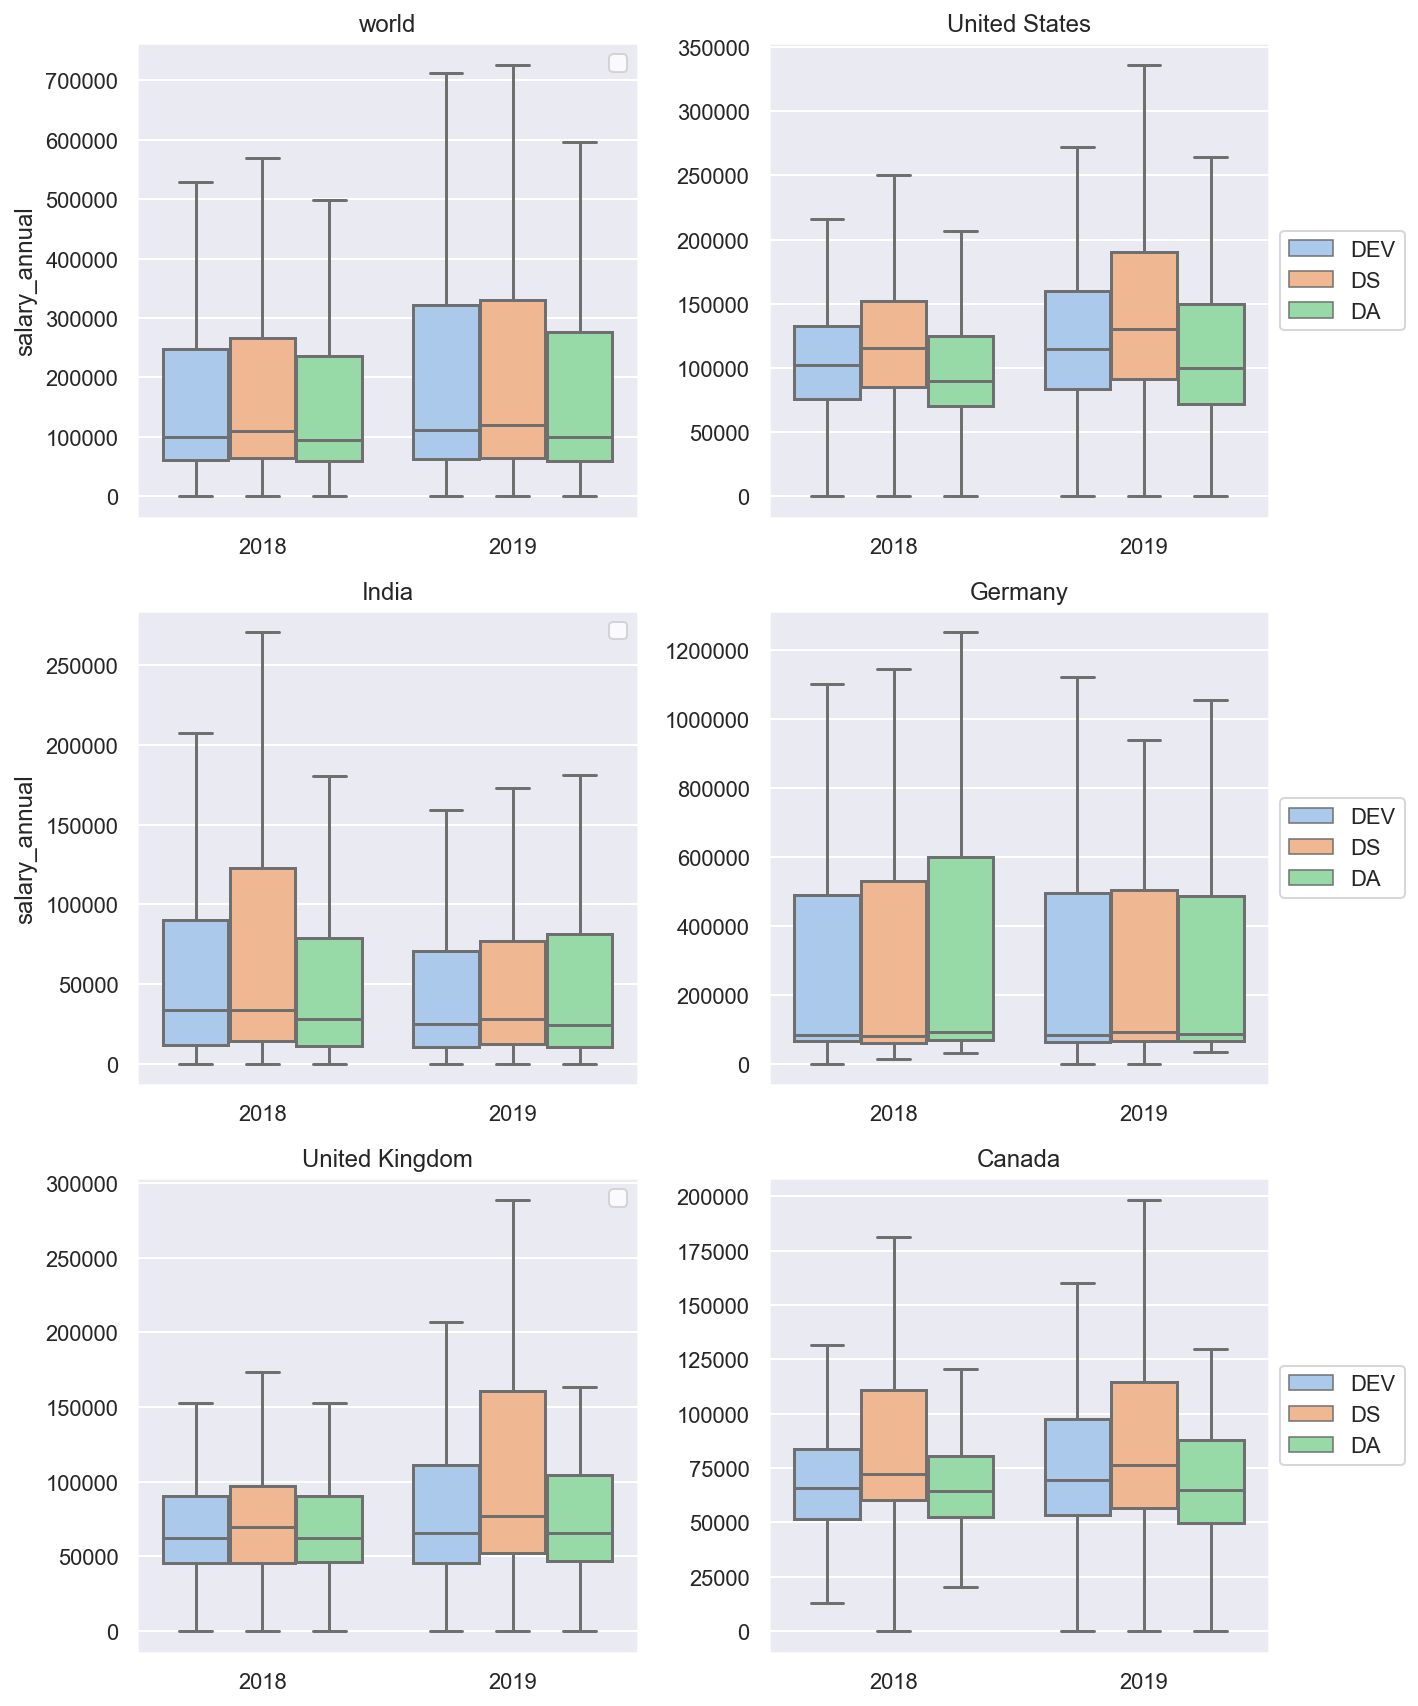

In [8]:
# prepare data to make plots
# world
data_2019 = data_2019_q2[(data_2019_q2['is_DEV'] | data_2019_q2['is_DS_ML'] | data_2019_q2['is_DA'])
                       & data_2019_q2['is_full_time']].copy()
data_2018 = data_2018_q2[(data_2018_q2['is_DEV'] | data_2018_q2['is_DS_ML'] | data_2018_q2['is_DA'])
                           & data_2018_q2['is_full_time']].copy()
data_world = c.combine_data_to_plot(data_2019, data_2018)

# united state
data_2019_us = data_2019_q2[(data_2019_q2['is_DEV'] | data_2019_q2['is_DS_ML'] | data_2019_q2['is_DA'])
                       & data_2019_q2['is_full_time'] & (data_2019_q2['country']=='United States')].copy()
data_2018_us = data_2018_q2[(data_2018_q2['is_DEV'] | data_2018_q2['is_DS_ML'] | data_2018_q2['is_DA'])
                       & data_2018_q2['is_full_time'] &(data_2018_q2['country']=='United States')].copy()
data_us = c.combine_data_to_plot(data_2019_us, data_2018_us)

# Germany
data_2019_GM = data_2019_q2[(data_2019_q2['is_DEV'] | data_2019_q2['is_DS_ML'] | data_2019_q2['is_DA'])
                       & data_2019_q2['is_full_time'] & (data_2019_q2['country']=='Germany')].copy()
data_2018_GM = data_2018_q2[(data_2018_q2['is_DEV'] | data_2018_q2['is_DS_ML'] | data_2018_q2['is_DA'])
                       & data_2018_q2['is_full_time'] &(data_2018_q2['country']=='Germany')].copy()
data_GM = c.combine_data_to_plot(data_2019_GM, data_2018_GM)

# Indian
data_2019_IN = data_2019_q2[(data_2019_q2['is_DEV'] | data_2019_q2['is_DS_ML'] | data_2019_q2['is_DA'])
                       & data_2019_q2['is_full_time'] & (data_2019_q2['country']=='India')].copy()
data_2018_IN = data_2018_q2[(data_2018_q2['is_DEV'] | data_2018_q2['is_DS_ML'] | data_2018_q2['is_DA'])
                       & data_2018_q2['is_full_time'] &(data_2018_q2['country']=='India')].copy()
data_IN = c.combine_data_to_plot(data_2019_IN, data_2018_IN)

# UK
data_2019_UK = data_2019_q2[(data_2019_q2['is_DEV'] | data_2019_q2['is_DS_ML'] | data_2019_q2['is_DA'])
                       & data_2019_q2['is_full_time'] & (data_2019_q2['country']=='United Kingdom')].copy()
data_2018_UK = data_2018_q2[(data_2018_q2['is_DEV'] | data_2018_q2['is_DS_ML'] | data_2018_q2['is_DA'])
                       & data_2018_q2['is_full_time'] &(data_2018_q2['country']=='United Kingdom')].copy()
data_UK = c.combine_data_to_plot(data_2019_UK, data_2018_UK)

# Canada
data_2019_CA = data_2019_q2[(data_2019_q2['is_DEV'] | data_2019_q2['is_DS_ML'] | data_2019_q2['is_DA'])
                       & data_2019_q2['is_full_time'] & (data_2019_q2['country']=='Canada')].copy()
data_2018_CA = data_2018_q2[(data_2018_q2['is_DEV'] | data_2018_q2['is_DS_ML'] | data_2018_q2['is_DA'])
                       & data_2018_q2['is_full_time'] &(data_2018_q2['country']=='Canada')].copy()
data_CA = c.combine_data_to_plot(data_2019_CA, data_2018_CA)

# visualize the comparsion

# world
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
sns.set(palette="pastel", style="ticks")
hue_order = ['DEV', 'DS', 'DA']
sns.boxplot(x="year", y="salary_annual", hue='professional', hue_order=hue_order,
            data=data_world, showfliers=False, ax=ax[0,0])
ax[0,0].legend('')
ax[0,0].set_xlabel('')
ax[0,0].set_title('world')

# United States
sns.boxplot(x="year", y="salary_annual", hue='professional', hue_order=hue_order,
            data=data_us, showfliers=False, ax=ax[0,1])
ax[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].set_title('United States')

# Indian
sns.boxplot(x="year", y="salary_annual", hue='professional', hue_order=hue_order,
            data=data_IN, showfliers=False, ax=ax[1,0])
ax[1,0].legend('')
ax[1,0].set_xlabel('')
ax[1,0].set_title('India')

# Germany
sns.boxplot(x="year", y="salary_annual", hue='professional', hue_order=hue_order,
            data=data_GM, showfliers=False, ax=ax[1,1])
ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].set_title('Germany')

# United Kingdom
sns.boxplot(x="year", y="salary_annual", hue='professional', hue_order=hue_order,
            data=data_UK, showfliers=False, ax=ax[2,0])
ax[2,0].legend('')
ax[2,0].set_xlabel('')
ax[2,0].set_ylabel('')
ax[2,0].set_title('United Kingdom')

# Canada
sns.boxplot(x="year", y="salary_annual", hue='professional', hue_order=hue_order,
            data=data_CA, showfliers=False, ax=ax[2,1])
ax[2,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[2,1].set_xlabel('')
ax[2,1].set_ylabel('')
ax[2,1].set_title('Canada')
save_fig('Salary_comparsion')
plt.show()

In [9]:
# print out the 25 percentile, median, 75 percentile of the annual salary
country_list = data_world['country'].value_counts().index.values[:5]
data_1 = data_world[(data_world['country'] == country_list[0])|
                    (data_world['country'] == country_list[1])|
                    (data_world['country'] == country_list[2])|
                    (data_world['country'] == country_list[3])|
                    (data_world['country'] == country_list[4])
                   ]
data_1.groupby(['country','year', 'professional'])['salary_annual'].quantile([0.25,0.5,0.75]).unstack()

0.25      0.50      0.75
country        year professional                             
Canada         2018 DA            52339.0   64417.0   80521.0
                    DEV           51534.0   66027.0   83742.0
                    DS            60391.0   72469.0  110717.0
               2019 DA            49906.5   64888.0   87789.0
                    DEV           53437.0   69468.0   97713.0
                    DS            56490.0   76339.0  114508.0
Germany        2018 DA            67313.0   91791.0  599184.0
                    DEV           66089.0   84448.0  488160.0
                    DS            61194.0   79552.0  528768.0
               2019 DA            66224.0   85931.0  486720.0
                    DEV           63016.0   82494.0  494928.0
                    DS            64735.0   91660.0  503640.0
India          2018 DA            10958.0   28178.0   78912.0
                    DEV           11741.0   33840.0   90144.0
                    DS            14480.5   33840.0  122472.0
               2019 DA            10337.5   24192.0   81648.0
                    DEV           10495.0   25187.0   70560.0
                    DS            12594.0   27986.0   76960.0
United Kingdom 2018 DA            46110.5   62507.0   90288.0
                    DEV           45838.0   62507.0   90288.0
                    DS            45838.0   69452.0   97233.0
               2019 DA            47105.0   65424.0  104678.0
                    DEV           45797.0   65424.0  111220.0
                    DS            52339.0   76742.0  160942.5
United States  2018 DA            70000.0   90000.0  125000.0
                    DEV           76000.0  102000.0  133000.0
                    DS            85000.0  115500.0  152000.0
               2019 DA            72000.0  100000.0  150000.0
                    DEV           83500.0  115000.0  160000.0
                    DS            91187.5  130000.0  190500.0

Assumption: big company vs small company. big company pays more than small company, and small company doesn't need ds since they don't have much data to analyze. I was wondering is that true?

Saving figure salary_company_size_world
Saving figure salary_company_size_US


Text(0.5, 0.98, 'India')

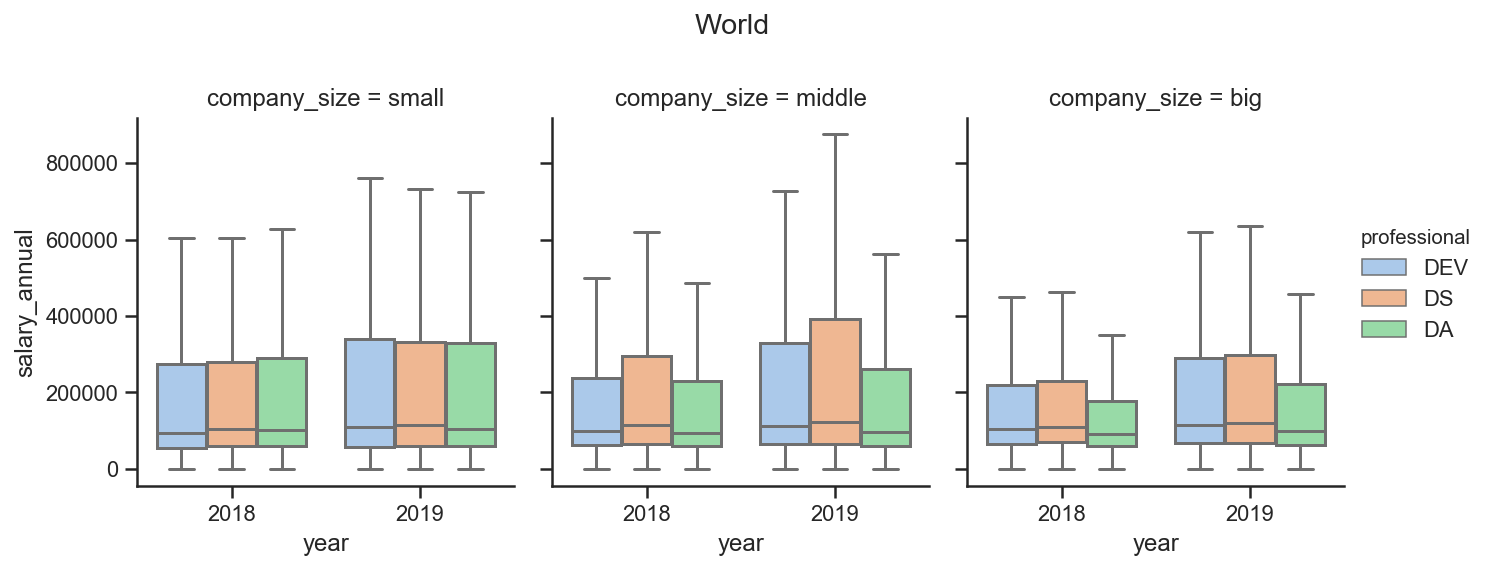

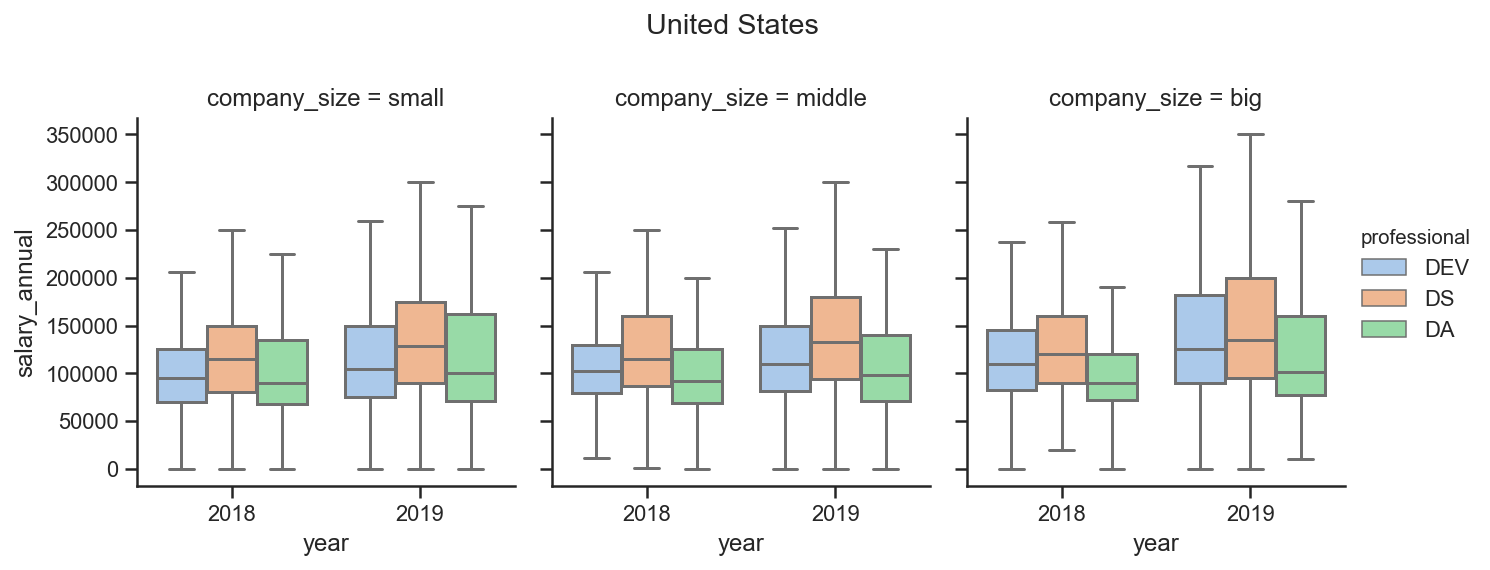

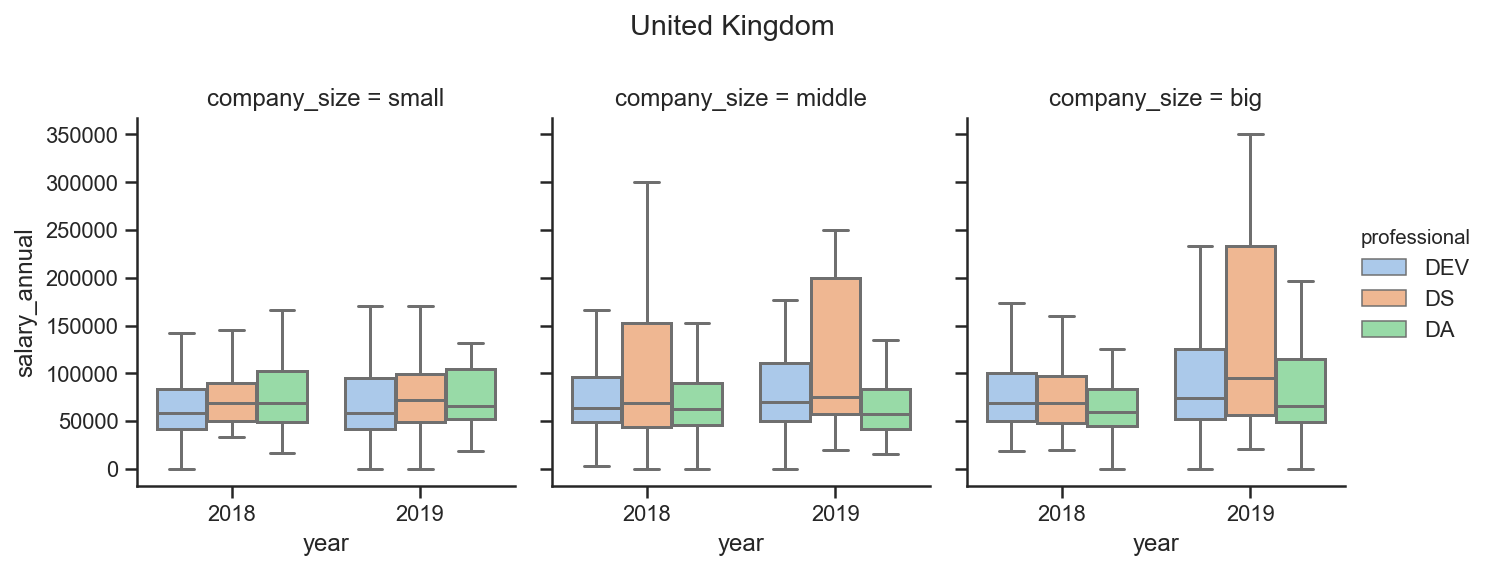

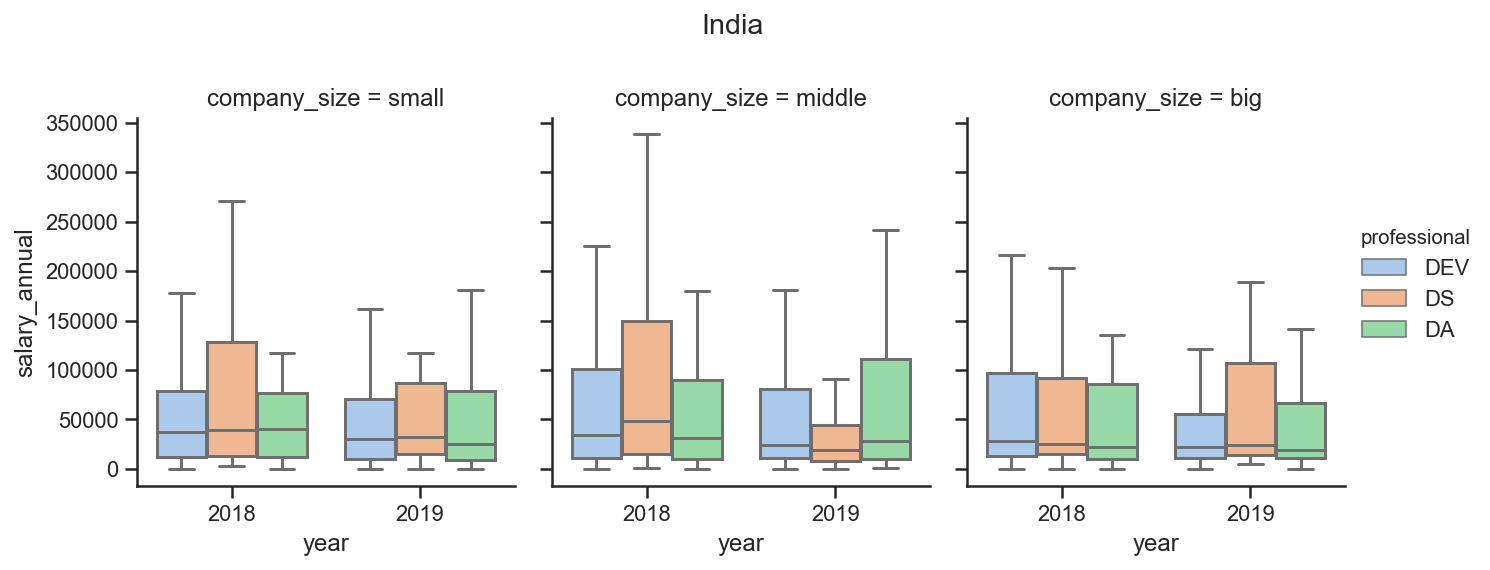

In [10]:
g = sns.catplot(x="year", y="salary_annual",
                hue="professional", col="company_size", col_order = ['small', 'middle', 'big'],
                data=data_world, kind="box", 
                showfliers=False, hue_order = hue_order,
                height=4, aspect=.8);
plt.subplots_adjust(top=0.8)
g.fig.suptitle('World')

save_fig('salary_company_size_world', tight_layout=False)

g = sns.catplot(x="year", y="salary_annual",
                hue="professional", col="company_size", col_order = ['small', 'middle', 'big'],
                data=data_us, kind="box", 
                showfliers=False, hue_order = hue_order,
                height=4, aspect=.8);
plt.subplots_adjust(top=0.8)
g.fig.suptitle('United States')
save_fig('salary_company_size_US', tight_layout=False)

g = sns.catplot(x="year", y="salary_annual",
                hue="professional", col="company_size", col_order = ['small', 'middle', 'big'],
                data=data_UK, kind="box", 
                showfliers=False, hue_order = hue_order,
                height=4, aspect=.8);
plt.subplots_adjust(top=0.8)
g.fig.suptitle('United Kingdom')

g = sns.catplot(x="year", y="salary_annual",
                hue="professional", col="company_size", col_order = ['small', 'middle', 'big'],
                data=data_IN, kind="box", 
                showfliers=False, hue_order = hue_order,
                height=4, aspect=.8);
plt.subplots_adjust(top=0.8)
g.fig.suptitle('India')

To be continue...
How about years of experience?